In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import csv
from sklearn.metrics import confusion_matrix
import glob, os

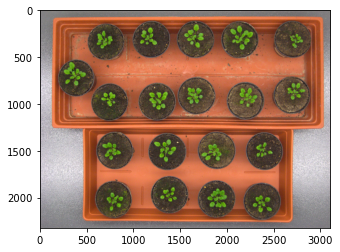

In [6]:
im = r'D:\OneDrive - UNSW\COMP9331\COMP9517_Project_20T3\Tray\Ara2012\ara2012_tray01_rgb.png'
fg = r'D:\OneDrive - UNSW\COMP9331\COMP9517_Project_20T3\Tray\Ara2012\ara2012_tray01_fg.png'
canon = 1

image = cv2.imread(im)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
he = image.shape[0]
we = image.shape[1]
plt.imshow(image)


In [3]:

#the segmentation algorithm
#ignore top of image
for y in range(0, int(0.07*he)):
    for x in range(0, we):
        if(canon == 1 and y < 0.065*he):
            image[y, x] = (255,255,255)


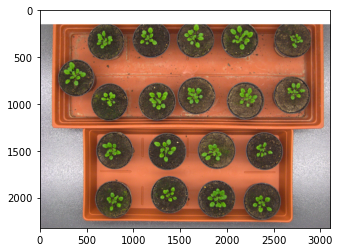

In [5]:
plt.imshow(image)

Projected


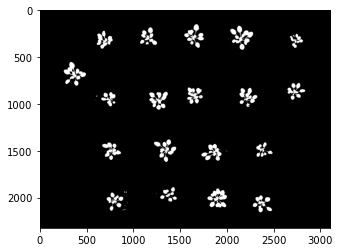

In [7]:


#LAB
LAB = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
lower_green = np.array([1,1,80])
upper_green = np.array([255,100,217])
mask = cv2.inRange(LAB, lower_green, upper_green)
mask = cv2.medianBlur(mask,3)
print("Projected")
plt.imshow(mask, cmap=plt.cm.gray)
plt.show()


Ground truth


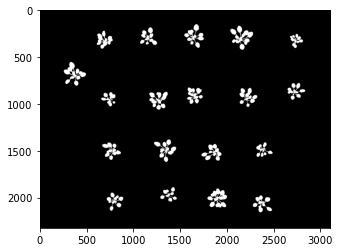

In [8]:

#ground truth
image_c = cv2.imread(fg)
image_c = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
print("Ground truth")
plt.imshow(image_c, cmap=plt.cm.gray)
plt.show()


In [10]:
#dice similarity coefficient
image_c = cv2.normalize(image_c, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=1)
image_c = np.reshape(image_c,-1)

mask = cv2.normalize(mask, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=1)
mask = np.reshape(mask,-1)
tn, fp, fn, tp = confusion_matrix(image_c, mask).ravel()
dice = 2*tp/(2*tp + fp + fn)
print("Dice: " + str(dice))

#true positive / (true positive + false positive + false negative)
iou = tp/(tp+fp+fn)
print("IoU: " + str(iou))


Dice: 0.979728196770713
IoU: 0.9602619553630234
